In [33]:
#Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# READ

In [34]:
df=pd.read_csv(r"C:\DataScience\uber.csv")

## 1.Pre-process the dataset

In [35]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
df.shape

(200000, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [38]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [39]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [40]:
df = df.drop(['Unnamed: 0','key'],axis=1)

In [41]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [42]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [44]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Filling Missing values

In [45]:
df.isnull()
#value present=false
#value absent=true

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [46]:
df.isnull().sum()
#shows null values coloumn vise

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [47]:
df.isnull().sum().sum()
#inorder to check all null values 

2

In [48]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
#filling up the null values by mean values

In [49]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [50]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [51]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce',utc=True)

In [52]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [53]:
#to segregate each time of date and time
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek,
             dayName= df.pickup_datetime.dt.day_name())

In [56]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [57]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [58]:
x=df['fare_amount'].value_counts()
#for unique values

In [59]:
print(type(x))
print("Max count=",x[6.50])
x

<class 'pandas.core.series.Series'>
Max count= 9684


6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: fare_amount, Length: 1244, dtype: int64

In [60]:
 df=df.drop('pickup_datetime',axis=1)

In [61]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [62]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dayName               object
dtype: object

In [63]:
df.drop(['dayName'],axis=1,inplace=True)

## Checking outliners and filling them 

In [64]:
number_of_columns=len(df.columns)

In [65]:
number_of_columns

11

##### Number of columns is 12(11 quntitative and 1 categorical ),but in the following box plots only 11 subplots are visible.

<Axes: >

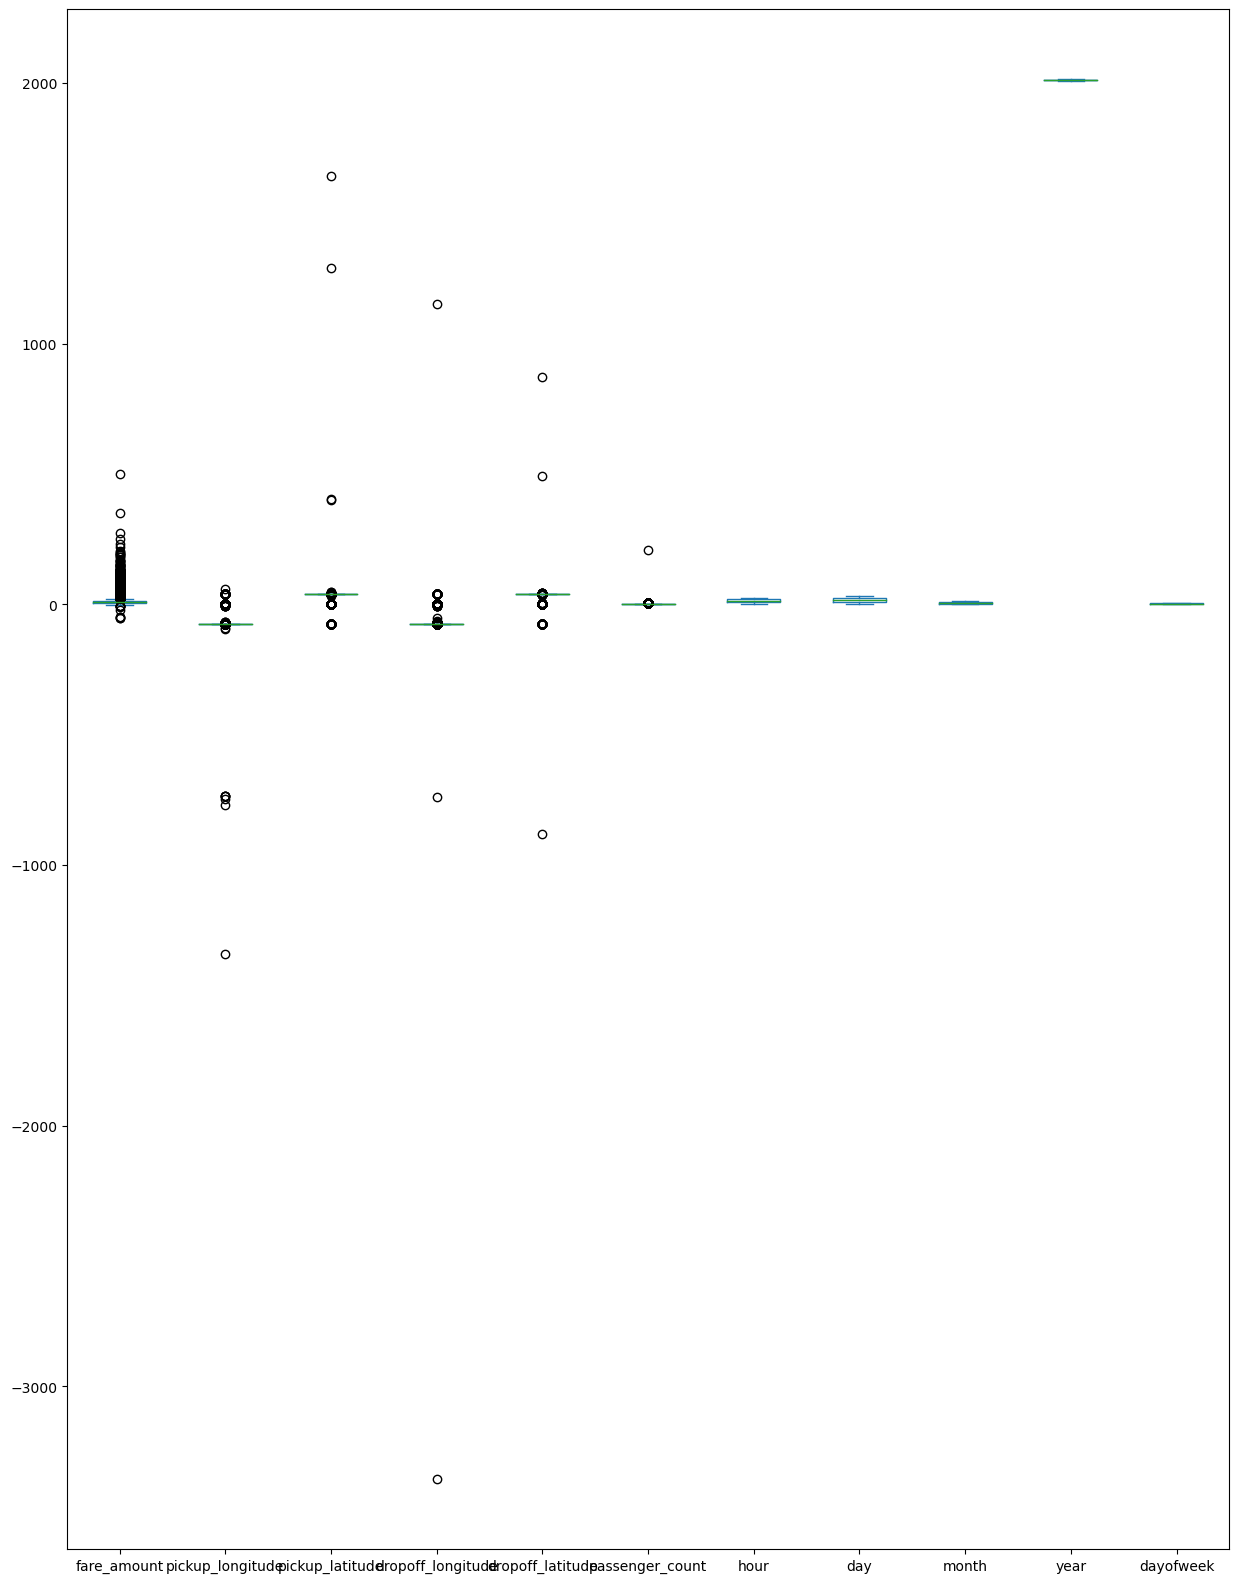

In [66]:
df.plot(kind="box",subplots=False,layout=(7,2),figsize=(15,20))

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

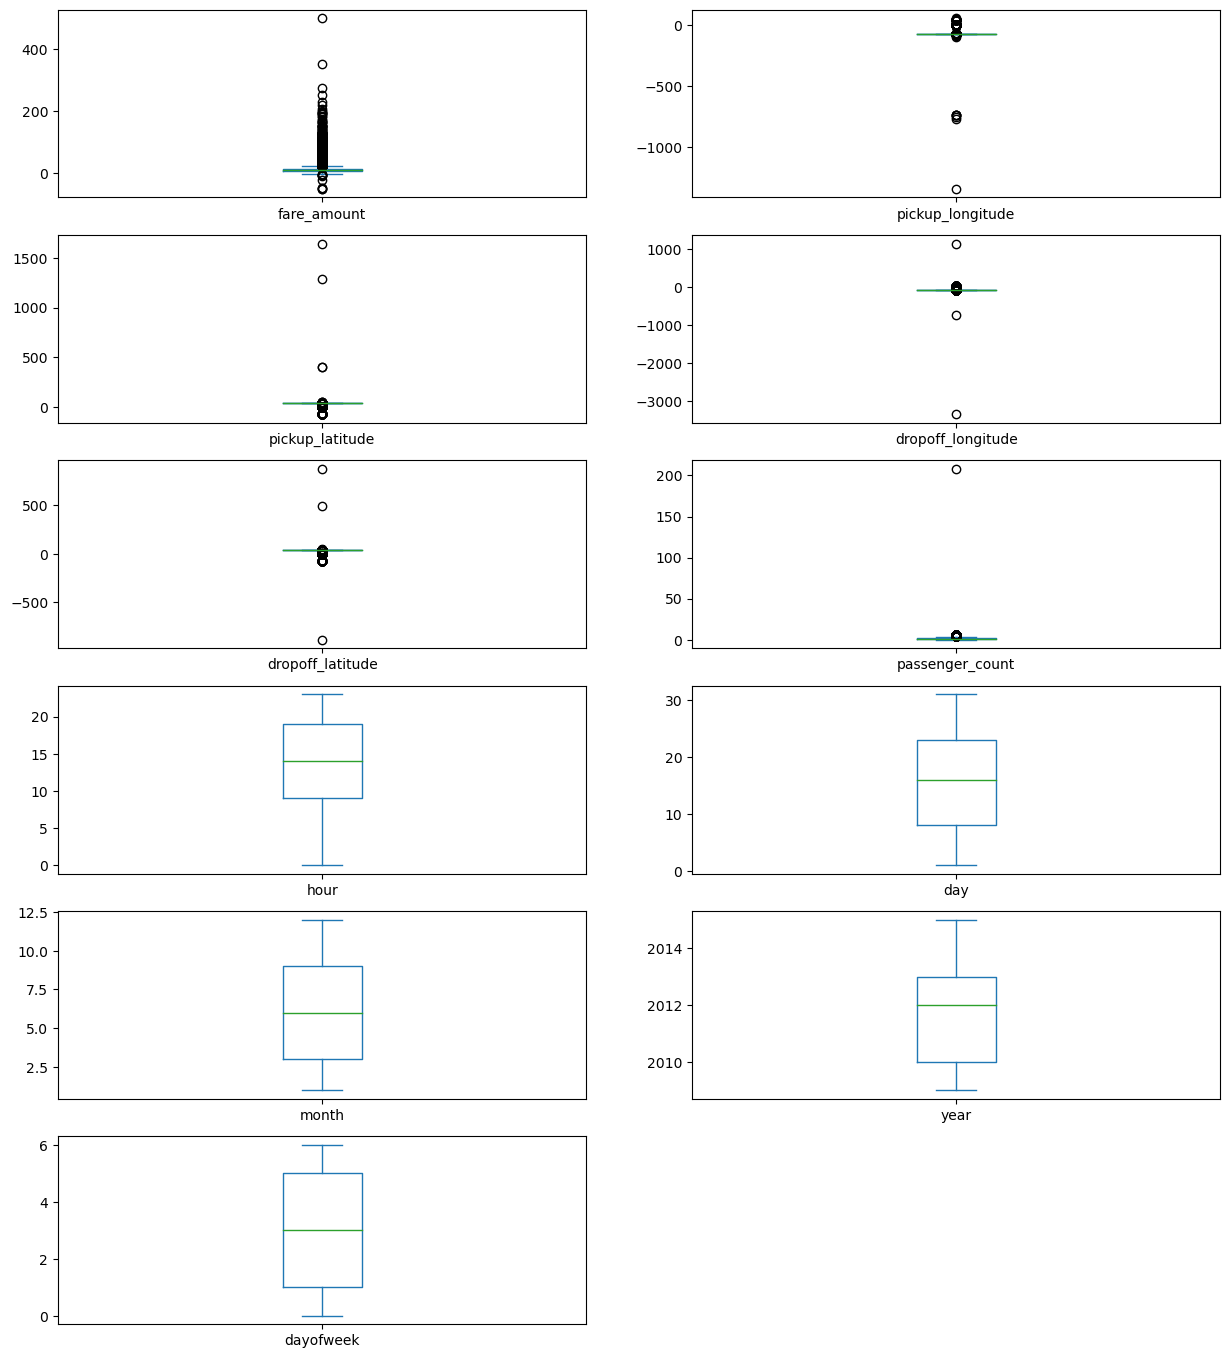

In [67]:
#if box plot is required for each col then subplot=True
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

#### Explanation of clip function 

In [68]:
a=np.arange(10,100,10)
a1=np.clip(a,30,60)
print("before clipping :",a)
print("after clipping :",a1)

before clipping : [10 20 30 40 50 60 70 80 90]
after clipping : [30 30 30 40 50 60 60 60 60]


In [69]:
#Using the InterQuartile Range to fill the values

def remove_outlier(df1, col):
    Q1= df1[col].quantile(0.25) 
    Q2= df1[col].quantile(0.50)
    Q3= df1[col].quantile(0.75)

    IQR= Q3- Q1 
    lower_whisker =Q1-1.5 *IQR
    upper_whisker = Q3+1.5 *IQR
    print("-----************************************--------")
    print("col=",col, "01",Q1, "Q2=",Q2, "Q3=",Q3)
    print("-----************************************--------")      
    df1[col]= np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    print("col_list",col_list)
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [70]:
df=treat_outliers_all(df,df.columns)

col_list Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
-----************************************--------
col= fare_amount 01 6.0 Q2= 8.5 Q3= 12.5
-----************************************--------
-----************************************--------
col= pickup_longitude 01 -73.992065 Q2= -73.98182299999999 Q3= -73.96715350000001
-----************************************--------
-----************************************--------
col= pickup_latitude 01 40.73479575 Q2= 40.752592 Q3= 40.767158
-----************************************--------
-----************************************--------
col= dropoff_longitude 01 -73.991407 Q2= -73.98009300000001 Q3= -73.963658
-----************************************--------
-----************************************--------
col= dropoff_latitude 01 40.733823 Q2= 40.753042 Q3= 40.76800113909912
-----

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

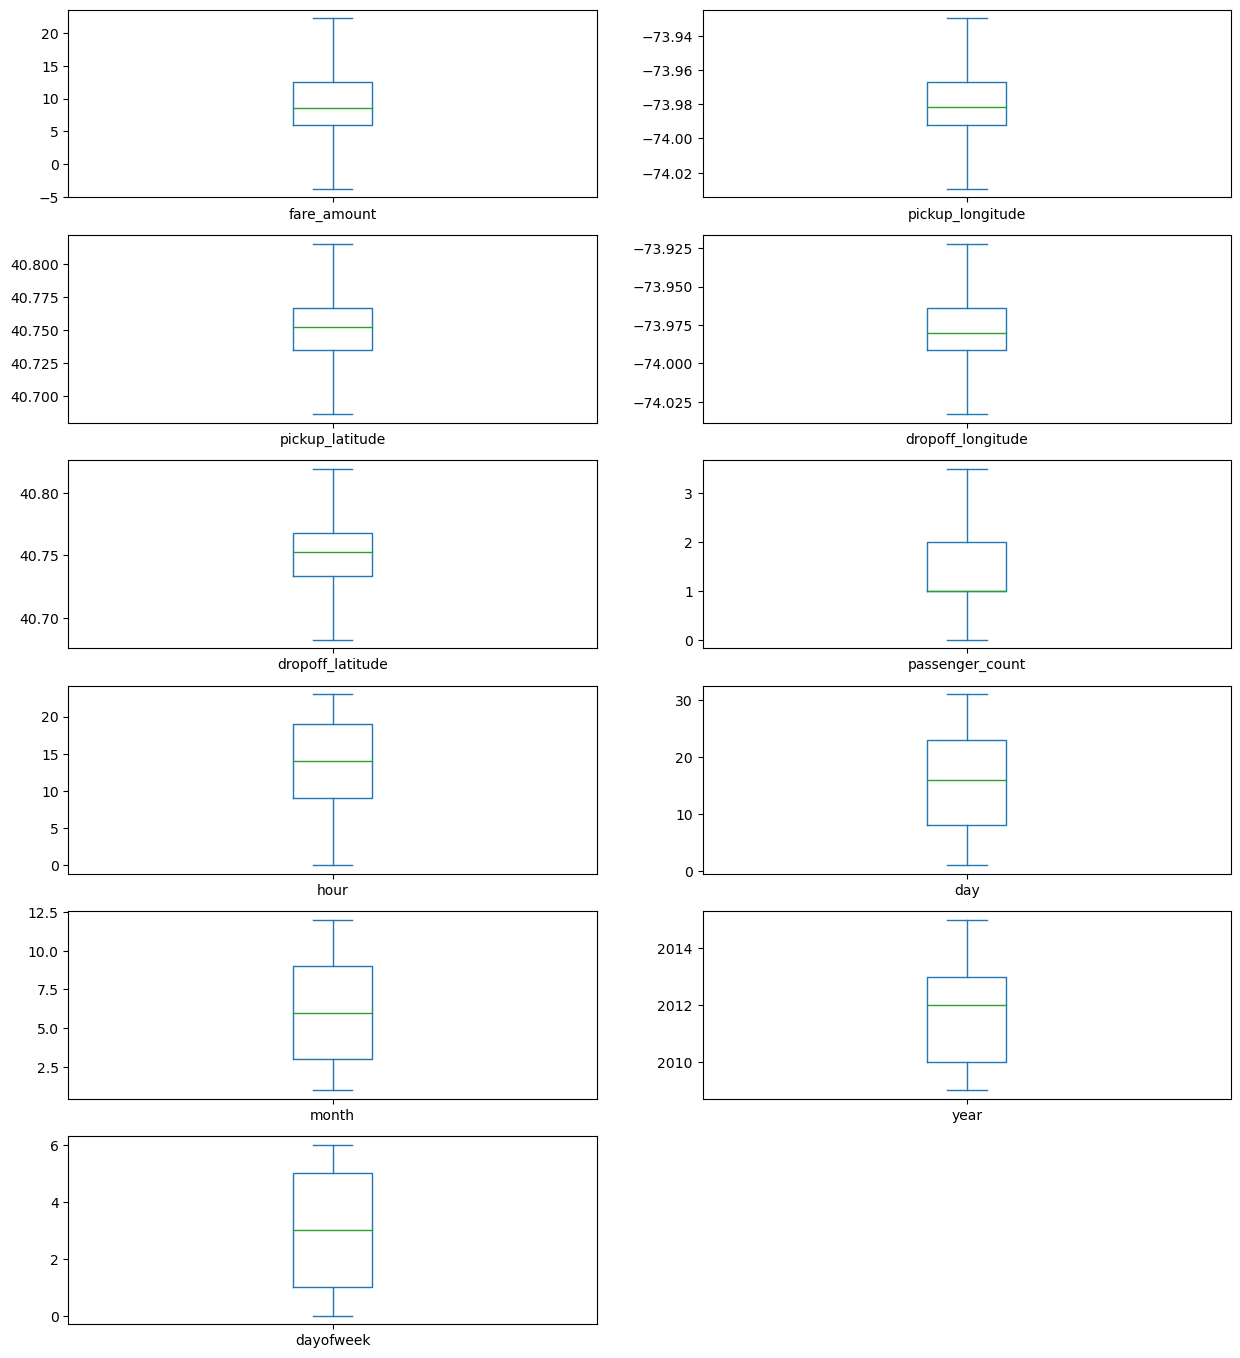

In [71]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [72]:
#Finding inccorect latitude (Less than -90 or greater than 90) and longitude (greater than 180 or less than -180)
incorrect_coordinates= df.loc[(df.pickup_latitude>90) | (df.pickup_latitude <-90) |
                              (df.dropoff_latitude> 90) | (df.dropoff_latitude <-90) | 
                              (df.pickup_longitude> 180) | (df.pickup_longitude <-180) | 
                              (df.dropoff_longitude> 90) | (df.dropoff_longitude <-90)
                             ]

In [73]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek


In [74]:
df.drop(incorrect_coordinates, inplace=True, errors = 'ignore')

In [75]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


In [76]:
!pip install haversine

In [77]:
import haversine as hs #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat su

travel_dist=[]

for pos in range(len(df['pickup_longitude'])):
        long1, latil, long2,lati2= [df[ 'pickup_longitude'][pos], df['pickup_latitude'][pos], df[ 'dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
        loc1=(latil, long1)
        loc2=(lati2, long2)
        c= hs.haversine(loc1, loc2)
        travel_dist.append(c)

print(travel_dist)

df['dist_travel_km'] = travel_dist

df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [78]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [79]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df[(df.dist_travel_km > 1) & (df.dist_travel_km <= 130)] 
print ("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (163040, 12)


In [80]:
bool_df=df.isnull()
bool_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,False,False


# Correlation

<Axes: >

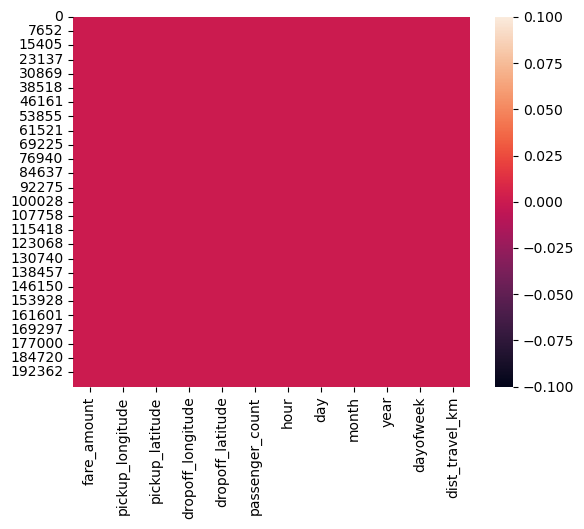

In [81]:
sns.heatmap(bool_df)#free of null values,no correlation exists since r=0[false is a constant value which is not related to the index of each row in the df ]

C:\Users\Bhoomika Hegde\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Bhoomika Hegde\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

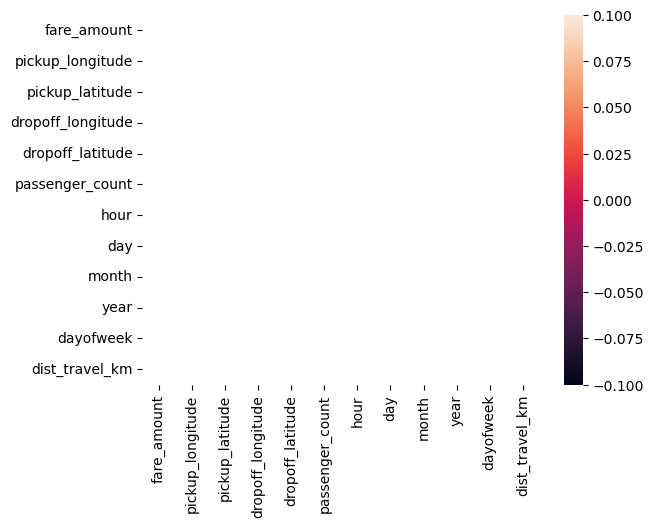

In [82]:
sns.heatmap(bool_df.corr())

In [83]:
corr=df.corr() #function to find the correlation 

In [84]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258616,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798927
pickup_longitude,0.193177,1.000000,0.425309,0.241587,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148775,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258616,0.241587,0.148775,1.000000,0.401698,-0.008670,-0.059730,-0.005912,0.002404,0.015657,-0.002164,0.247271
dropoff_latitude,-0.137745,0.169203,0.358836,0.401698,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008670,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059730,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047252
day,0.001607,-0.004459,0.002907,-0.005912,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002404,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015657,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


<Axes: >

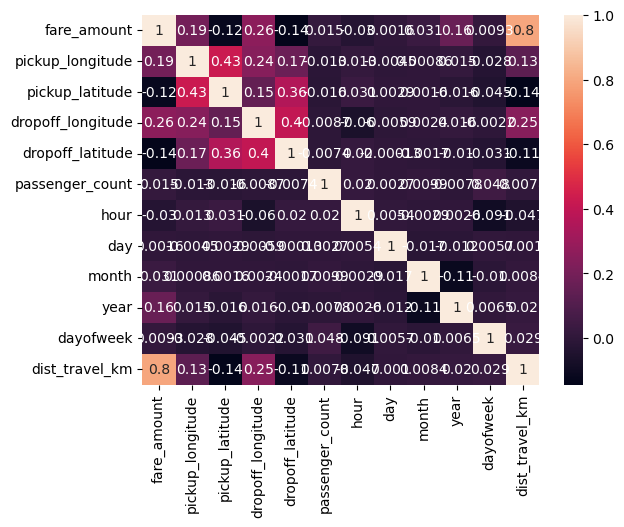

In [85]:
sns.heatmap(df.corr(),annot=True)#light values means highly correleated

In [86]:
#each coloumn is perfectly correleated with itself

# Dividing the dataset into feature and target values

In [87]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

In [88]:
x=df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek', 'dist_travel_km']]

#### OR,since all coloumns except "fare_amount" are the features,the following can be done instead

In [89]:
x=df[df.columns[1:]]#since 0th column is fare amount 
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1.0,14,31,1,2014,4,1.122879
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0,8.919418
199998,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


In [90]:
y=df['fare_amount']
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199994    12.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 163040, dtype: float64

## Dividing the dataset into training and testing dataset

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=7)#30% for training 70% for testing

In [92]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
85111,-73.979022,40.777218,-74.006340,40.739864,3.0,21,27,11,2010,5,4.748305
134870,-74.001322,40.731158,-74.008248,40.743092,1.0,16,7,5,2013,1,1.449640
82644,-73.985282,40.751895,-73.977094,40.765192,3.0,14,3,1,2009,5,1.631489
110503,-73.965110,40.764404,-73.972360,40.753432,1.0,16,18,10,2010,0,1.364317
95194,-73.988655,40.737095,-74.003300,40.732762,1.0,20,25,2,2013,0,1.324667
...,...,...,...,...,...,...,...,...,...,...,...
81555,-73.983937,40.773500,-73.996047,40.750557,3.5,18,21,9,2013,5,2.747475
65586,-73.929786,40.773702,-73.922034,40.692712,3.5,19,20,9,2011,1,9.029344
13187,-73.971954,40.782089,-73.957771,40.774437,3.5,1,19,4,2015,6,1.466364
60932,-73.968068,40.799880,-73.984100,40.749037,3.5,14,18,12,2010,5,5.812440


In [93]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
4601,-73.980368,40.745082,-73.965373,40.756930,3.5,23,16,5,2011,0,1.825137
16992,-73.971989,40.750650,-73.922034,40.722312,2.0,0,14,2,2011,0,5.257748
22135,-73.988637,40.737163,-73.990168,40.748987,2.0,12,6,12,2011,1,1.321082
143093,-73.979542,40.781737,-73.982103,40.752105,2.0,9,25,8,2010,2,3.301984
42087,-74.000102,40.761207,-73.991612,40.751532,1.0,7,23,12,2010,3,1.291802
...,...,...,...,...,...,...,...,...,...,...,...
43618,-73.979320,40.749995,-74.033030,40.687721,1.0,14,15,12,2009,1,8.272803
14485,-73.950343,40.783722,-73.968238,40.796972,1.0,8,6,1,2013,6,2.107203
154067,-74.003772,40.748191,-73.966122,40.768755,1.0,16,13,5,2009,2,3.909568
26162,-73.983575,40.765592,-73.983882,40.780910,1.0,17,30,10,2013,2,1.703482


In [94]:
y_train

85111     10.1
134870     6.5
82644      4.9
110503     5.7
95194      7.0
          ... 
81555      8.5
65586     19.7
13187      5.5
60932     17.3
75614      9.0
Name: fare_amount, Length: 48912, dtype: float64

In [95]:
y_test

4601       6.50
16992     22.25
22135      7.30
143093    12.10
42087      5.30
          ...  
43618     22.25
14485      8.00
154067    10.50
26162      9.00
175834    10.90
Name: fare_amount, Length: 114128, dtype: float64

In [96]:
len(y)#100% of entries

163040

In [97]:
len(y_train)#30% for training 

48912

In [98]:
len(y_test)#70% for testing 

114128

In [99]:
len(y_train)+len(y_test)

163040

## Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [101]:
regression.fit(x_train,y_train)

LinearRegression()

In [102]:
regression.intercept_ #To find the linear intercept

3802.438115703752

In [103]:
regression.coef_

array([ 2.73959452e+01, -7.30942074e+00,  2.19313353e+01, -1.73263334e+01,
        5.93904155e-02,  9.70486617e-03,  5.11073468e-03,  6.52945245e-02,
        4.25070860e-01, -3.72182504e-02,  1.79572373e+00])

In [104]:
for i in range(0,len(regression.coef_)):
    print("theta",i,"=",regression.coef_[i])

theta 0 = 27.395945235329215
theta 1 = -7.309420744813896
theta 2 = 21.931335296219952
theta 3 = -17.326333369232092
theta 4 = 0.0593904155034309
theta 5 = 0.00970486617395138
theta 6 = 0.005110734682556958
theta 7 = 0.06529452454845708
theta 8 = 0.4250708598256433
theta 9 = -0.037218250442789785
theta 10 = 1.7957237345885735


In [105]:
y_pred = regression.predict(x_test)

In [106]:
comparison = pd.DataFrame({"Actual Label":y_test,"Predicted Label":y_pred})

In [107]:
comparison

,Actual Label,Predicted Label
4601,6.50,8.459769
16992,22.25,15.844513
22135,7.30,7.152705
143093,12.10,10.100588
42087,5.30,6.013979
...,...,...
43618,22.25,19.074887
14485,8.00,8.770292
154067,10.50,10.161302
26162,9.00,8.149147


In [108]:
comparison.reset_index()

,index,Actual Label,Predicted Label
0,4601,6.50,8.459769
1,16992,22.25,15.844513
2,22135,7.30,7.152705
3,143093,12.10,10.100588
4,42087,5.30,6.013979
...,...,...,...
114123,43618,22.25,19.074887
114124,14485,8.00,8.770292
114125,154067,10.50,10.161302
114126,26162,9.00,8.149147


<Axes: >

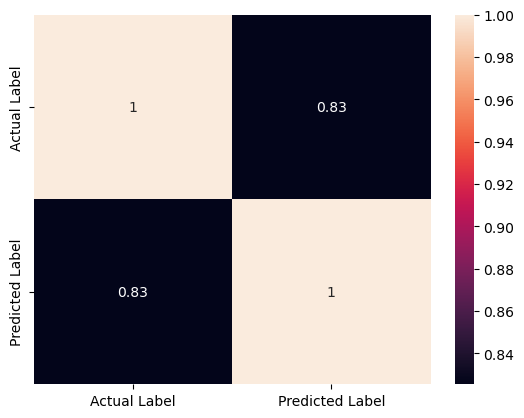

In [109]:
sns.heatmap(comparison.corr(),annot=True)

### Metrices Evaluation using R2,Mean squared error,root mean squared error

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test,y_pred)

0.6812560999629211

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
MSE = mean_squared_error(y_test,y_pred)

In [114]:
MSE

9.123152535403621

In [115]:
RMSE = np.sqrt(MSE)

In [116]:
RMSE

3.020455683403354

### Random Forest Regression

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf = RandomForestRegressor(n_estimators=100)

In [119]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
y_pred = rf.predict(x_test)

In [121]:
y_pred

array([ 6.279, 21.788,  7.272, ..., 11.084,  7.665, 10.92 ])

### Metrics evaluation for  Random Forest

In [122]:
R2_Random = r2_score(y_test,y_pred)

In [123]:
R2_Random

0.8204625048579983

In [124]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [125]:
MSE_Random

5.138758588993324

In [126]:
RMSE_Random = np.sqrt(MSE_Random)

In [127]:
RMSE_Random

2.2668830117571845